In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/catholic.csv'
df = pd.read_csv(file_path)

In [ ]:
print("Dataset Dimensions:", df.shape)
print("Column Data Types:\n", df.dtypes)
print("First 5 Rows:\n", df.head())
print("Summary Statistics:\n", df.describe())
print("Missing Values per Column:\n", df.isnull().sum())

Dataset Dimensions: (7430, 14)
Column Data Types:
 rownames      int64
id            int64
read12      float64
math12      float64
female        int64
asian         int64
hispan        int64
black         int64
motheduc    float64
fatheduc    float64
lfaminc     float64
hsgrad      float64
cathhs        int64
parcath       int64
dtype: object
First 5 Rows:
    rownames      id  read12  math12  female  asian  hispan  black  motheduc  \
0         1  124902   61.41   49.77       0      0       0      0      14.0   
1         2  124915   58.34   59.84       0      0       0      0      14.0   
2         3  124916   59.33   50.38       1      0       0      0      14.0   
3         4  124932   49.59   45.03       1      0       0      0      12.0   
4         5  124944   57.62   54.26       1      0       0      0      12.0   

   fatheduc   lfaminc  hsgrad  cathhs  parcath  
0      12.0  10.30895     1.0       0        1  
1      14.0  10.30895     1.0       0        1  
2      11.0  10.30

In [ ]:
# Data Cleaning: Handling Missing Values
# For columns with missing values, we can fill or drop them based on relevance
df['hsgrad'] = df['hsgrad'].fillna(df['hsgrad'].mode()[0])  # Fill with mode as it's categorical

# Confirm no missing values remain
print("Remaining Missing Values:\n", df.isnull().sum())

Remaining Missing Values:
 rownames    0
id          0
read12      0
math12      0
female      0
asian       0
hispan      0
black       0
motheduc    0
fatheduc    0
lfaminc     0
hsgrad      0
cathhs      0
parcath     0
dtype: int64


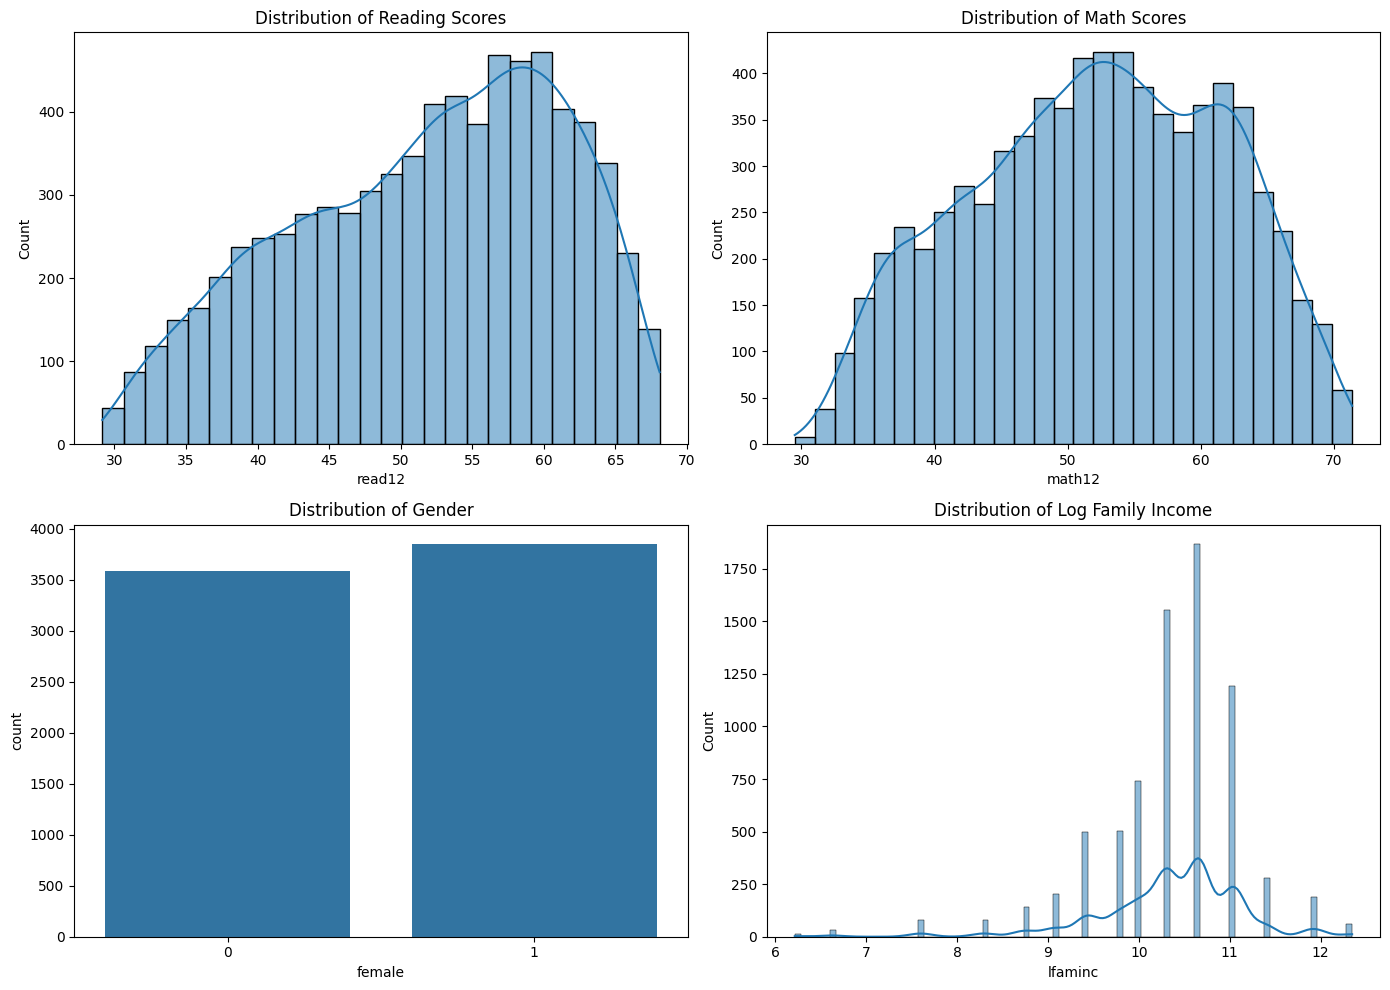

In [ ]:
# Univariate Analysis
# Plotting histograms for continuous variables and count plots for categorical variables
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['read12'], kde=True)
plt.title('Distribution of Reading Scores')

plt.subplot(2, 2, 2)
sns.histplot(df['math12'], kde=True)
plt.title('Distribution of Math Scores')

plt.subplot(2, 2, 3)
sns.countplot(x='female', data=df)
plt.title('Distribution of Gender')

plt.subplot(2, 2, 4)
sns.histplot(df['lfaminc'], kde=True)
plt.title('Distribution of Log Family Income')

plt.tight_layout()
plt.show()

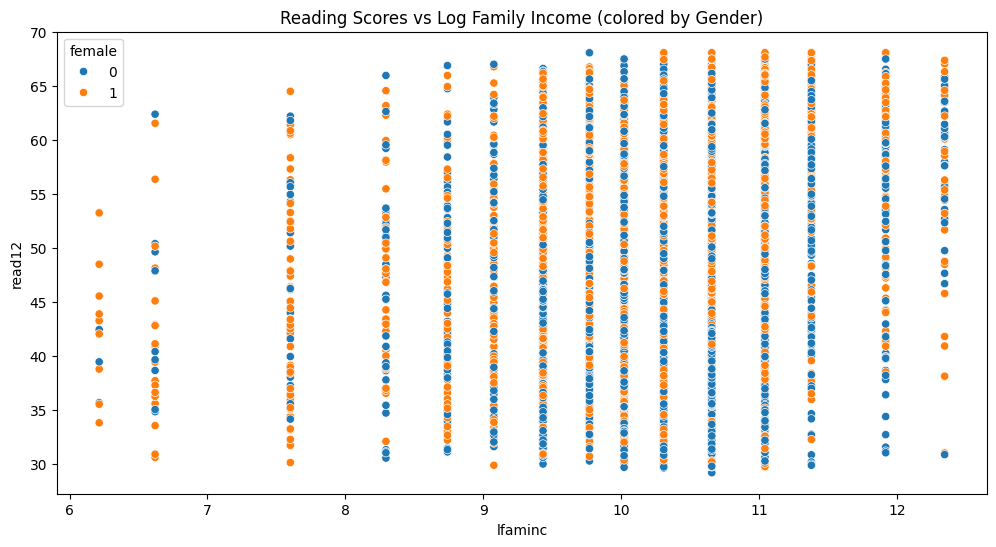

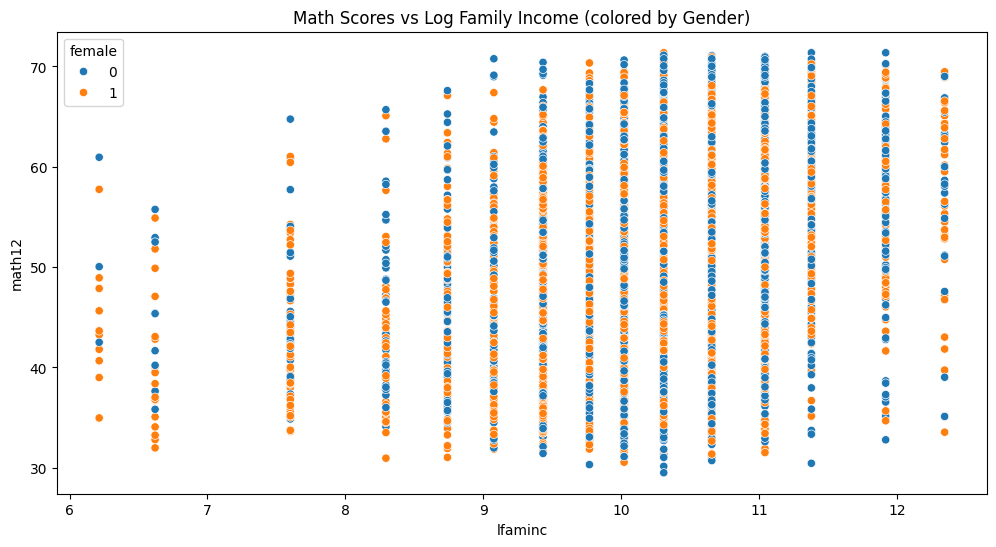

In [ ]:
# Bivariate Analysis
# Analyzing relationships between variables, e.g., scores vs family income
plt.figure(figsize=(12, 6))
sns.scatterplot(x='lfaminc', y='read12', hue='female', data=df)
plt.title('Reading Scores vs Log Family Income (colored by Gender)')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='lfaminc', y='math12', hue='female', data=df)
plt.title('Math Scores vs Log Family Income (colored by Gender)')
plt.show()

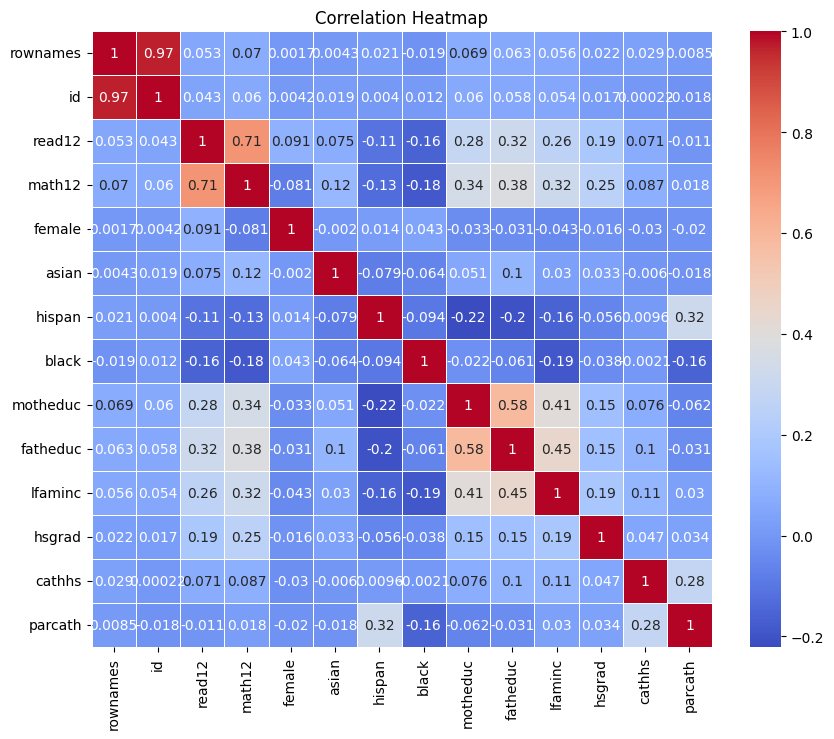

In [ ]:
# Correlation Heatmap for numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

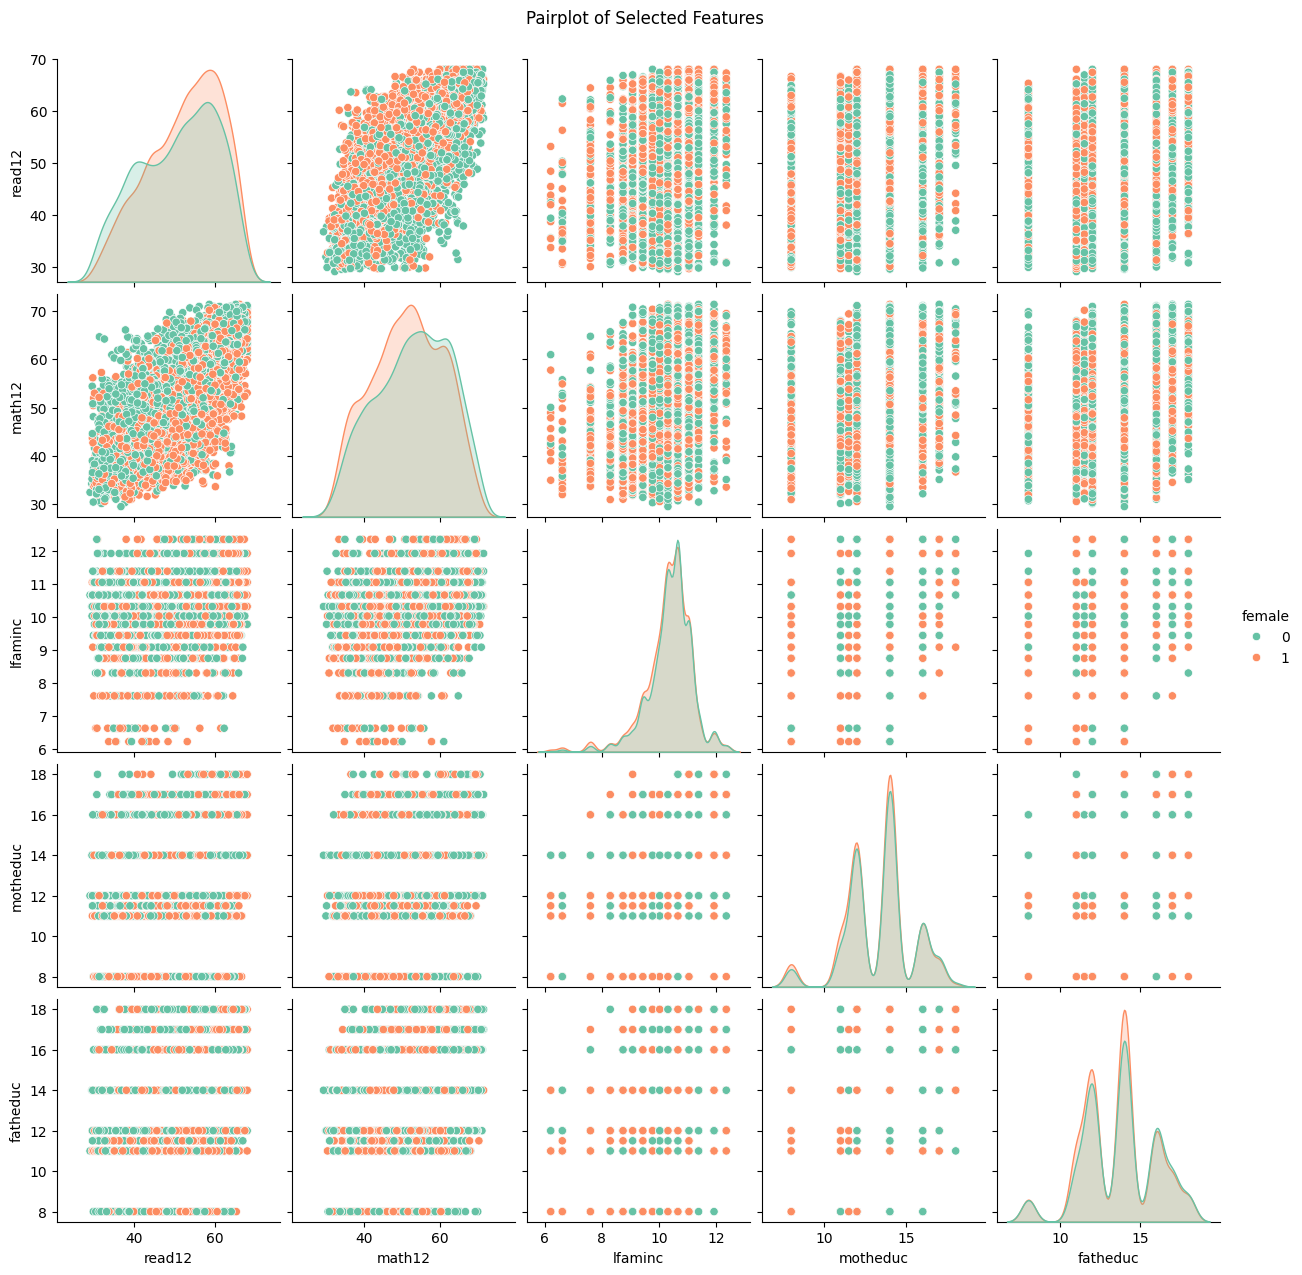

In [ ]:
# Multivariate Analysis: Exploring combined relationships between multiple factors
# Pairplot of selected features
selected_features = ['read12', 'math12', 'lfaminc', 'motheduc', 'fatheduc', 'female'] # Include 'female' in selected_features
sns.pairplot(df[selected_features], hue='female', palette="Set2")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()